In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


plt.figure(figsize=(10,5))
sns.set_style("whitegrid")



amazon_india_2015_2025 = pd.read_csv("C:\\Users\\DVK\\Desktop\\Amazon_decade_Sales_project\\notebooks\\amazon_india_cleaned_2015_2025.csv")

<Figure size 1000x500 with 0 Axes>

# 12.

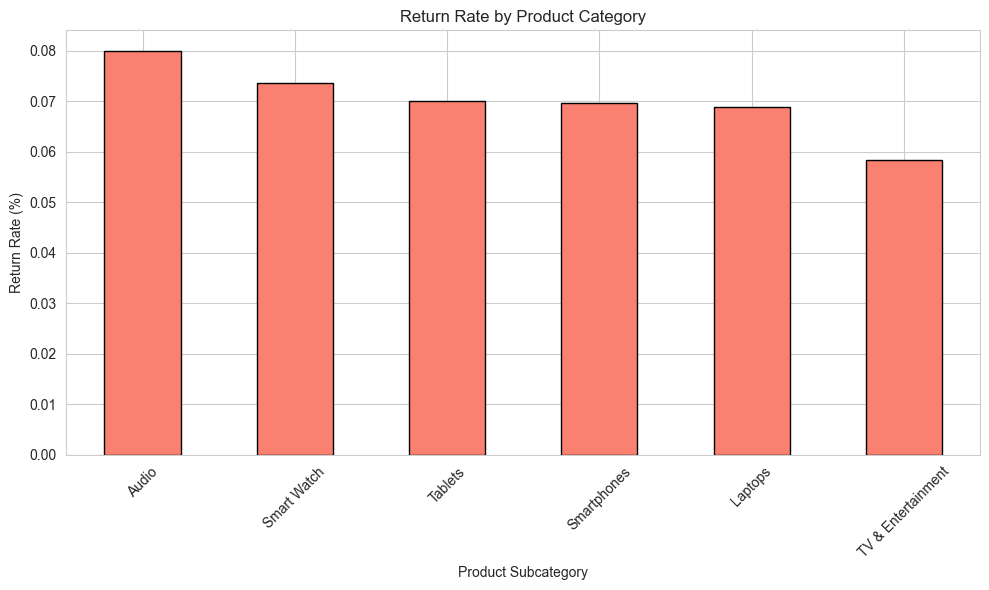

C:\Users\DVK\AppData\Local\Temp\ipykernel_21872\2336722264.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='return_status', y='product_rating', data=amazon_india_2015_2025, palette='Set2')


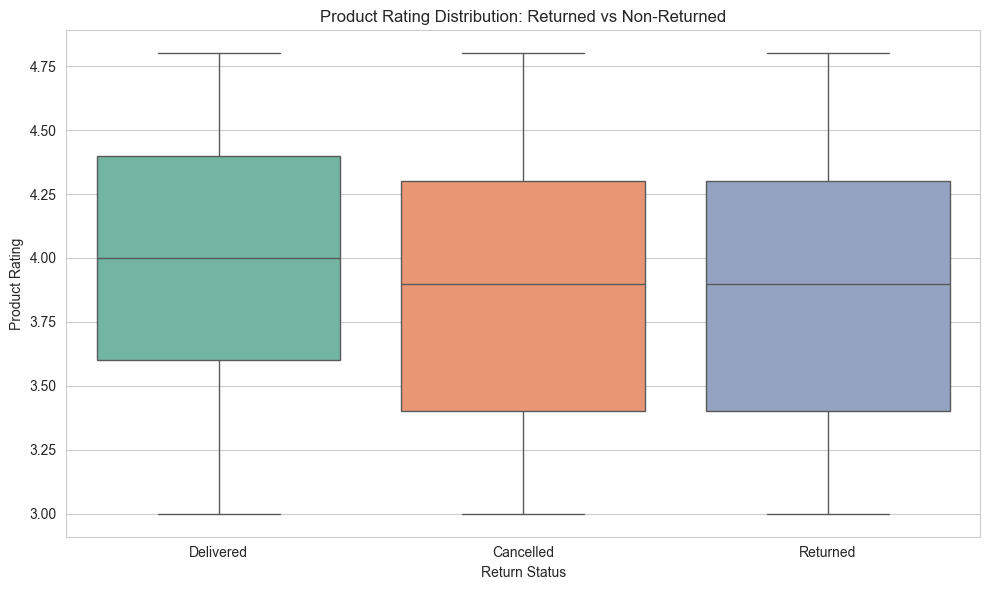

,total_orders,total_returns,return_rate_%
subcategory,,,
Audio,50623,4051,8.002291
Smart Watch,74708,5504,7.367350
Tablets,70254,4916,6.997466
Smartphones,827177,57604,6.963927
Laptops,88370,6089,6.890347
TV & Entertainment,16477,961,5.832372


In [4]:
# Product Return Analysis 

# Return Rate by Category
if 'return_status' in amazon_india_2015_2025.columns and 'subcategory' in amazon_india_2015_2025.columns:
    return_rate = amazon_india_2015_2025.groupby('subcategory')['return_status'].apply(lambda x: (x == 'Returned').mean())
    
    plt.figure(figsize=(10,6))
    return_rate.sort_values(ascending=False).plot(kind='bar', color='salmon', edgecolor='black')
    plt.title('Return Rate by Product Category')
    plt.ylabel('Return Rate (%)')
    plt.xlabel('Product Subcategory')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("Columns 'return_status' or 'subcategory' not found in dataset.")

# Product Rating Distribution: Returned vs Non-Returned
if 'return_status' in amazon_india_2015_2025.columns and 'product_rating' in amazon_india_2015_2025.columns:
    plt.figure(figsize=(10,6))
    sns.boxplot(x='return_status', y='product_rating', data=amazon_india_2015_2025, palette='Set2')
    plt.title('Product Rating Distribution: Returned vs Non-Returned')
    plt.xlabel('Return Status')
    plt.ylabel('Product Rating')
    plt.tight_layout()
    plt.show()
else:
    print("Columns 'return_status' or 'product_rating' missing in dataset.")

# Summary Table: Return Statistics
if 'return_status' in amazon_india_2015_2025.columns and 'subcategory' in amazon_india_2015_2025.columns:
    summary = amazon_india_2015_2025.groupby('subcategory').agg(
        total_orders=('return_status', 'count'),
        total_returns=('return_status', lambda x: (x == 'Returned').sum())
    )
    summary['return_rate_%'] = (summary['total_returns'] / summary['total_orders']) * 100
    display(summary.sort_values('return_rate_%', ascending=False).head(10))
else:
    print("Cannot create summary table due to missing columns.")


# 13.

Top Brands by Revenue:


,brand,total_revenue
22,Samsung,2.062142e+10
4,Apple,1.632240e+10
19,OnePlus,1.232417e+10
27,Xiaomi,5.450159e+09
21,Realme,3.015664e+09
26,Vivo,2.348077e+09
20,Oppo,2.268237e+09
14,Lenovo,2.084388e+09
2,Alienware,1.659859e+09
0,ASUS,1.458950e+09


C:\Users\DVK\AppData\Local\Temp\ipykernel_21872\2254658313.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


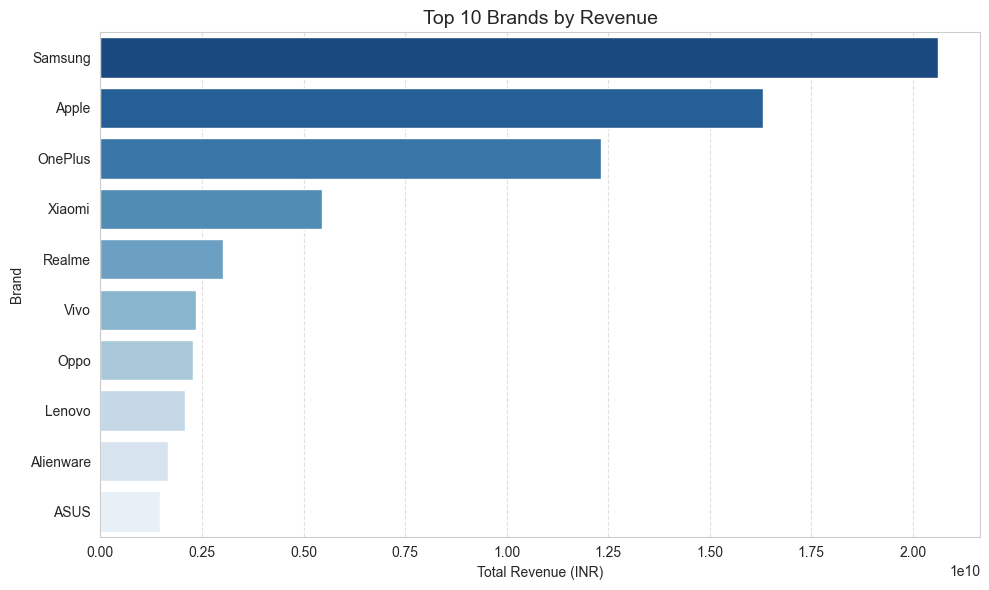


Brand Market Share (%):


,brand,total_revenue,market_share_%
22,Samsung,2.062142e+10,26.82
4,Apple,1.632240e+10,21.23
19,OnePlus,1.232417e+10,16.03
27,Xiaomi,5.450159e+09,7.09
21,Realme,3.015664e+09,3.92
26,Vivo,2.348077e+09,3.05
20,Oppo,2.268237e+09,2.95
14,Lenovo,2.084388e+09,2.71
2,Alienware,1.659859e+09,2.16
0,ASUS,1.458950e+09,1.90


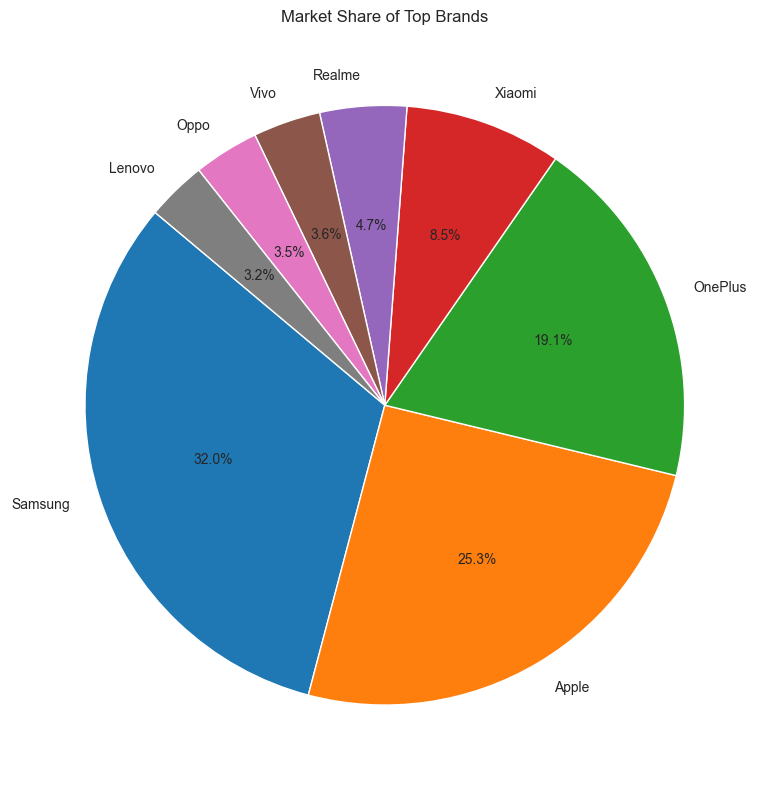

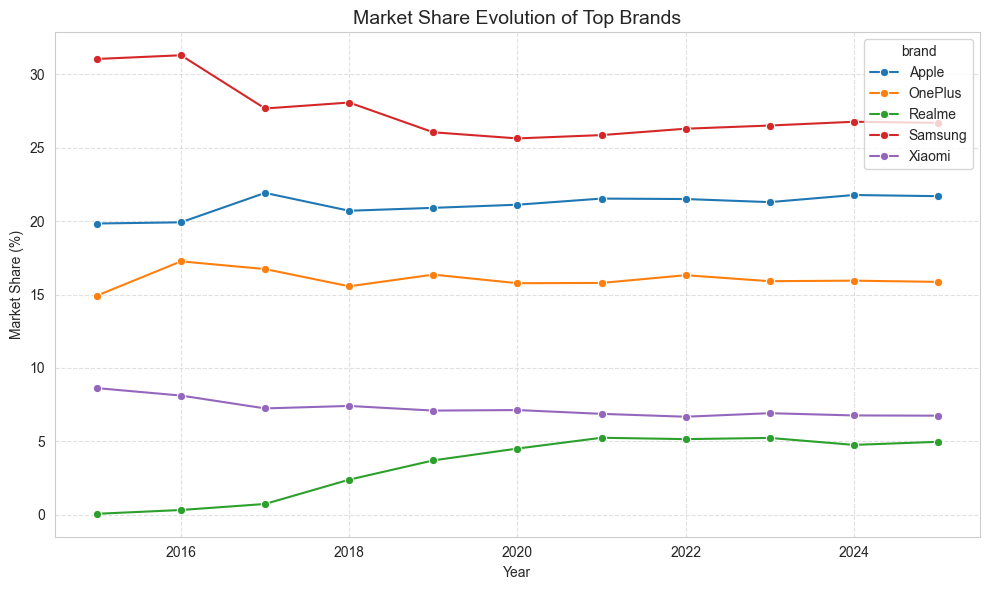


Brand Performance Across Categories (Sample):


,category,brand,final_amount_inr
0,Electronics,ASUS,1.458656e+09
1,Electronics,Acer,1.416988e+09
2,Electronics,Alienware,1.659453e+09
3,Electronics,Amazfit,3.836413e+08
4,Electronics,Apple,1.632027e+10
5,Electronics,Audio-Technica,1.958026e+08
6,Electronics,Boat,9.269559e+07
7,Electronics,Dell,9.763201e+08
8,Electronics,Fire-Boltt,3.102633e+08
9,Electronics,Fitbit,4.534065e+08


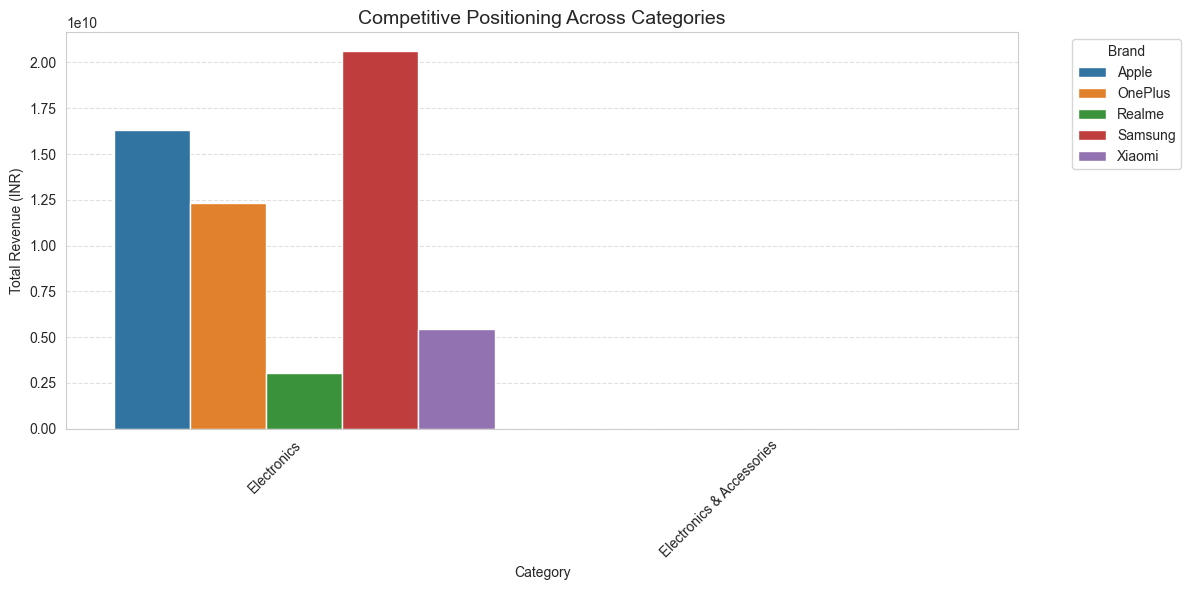


Brand Competitive Positioning:


,brand,avg_price,total_revenue
0,ASUS,90210.798802,1.458950e+09
1,Acer,80917.500197,1.417521e+09
2,Alienware,90996.119220,1.659859e+09
3,Amazfit,36055.190458,3.836413e+08
4,Apple,116597.447079,1.632240e+10
5,Audio-Technica,18170.877706,1.958026e+08
6,Boat,15364.788939,9.269559e+07
7,Dell,83060.321525,9.763832e+08
8,Fire-Boltt,31256.902246,3.103198e+08
9,Fitbit,34328.196870,4.535295e+08


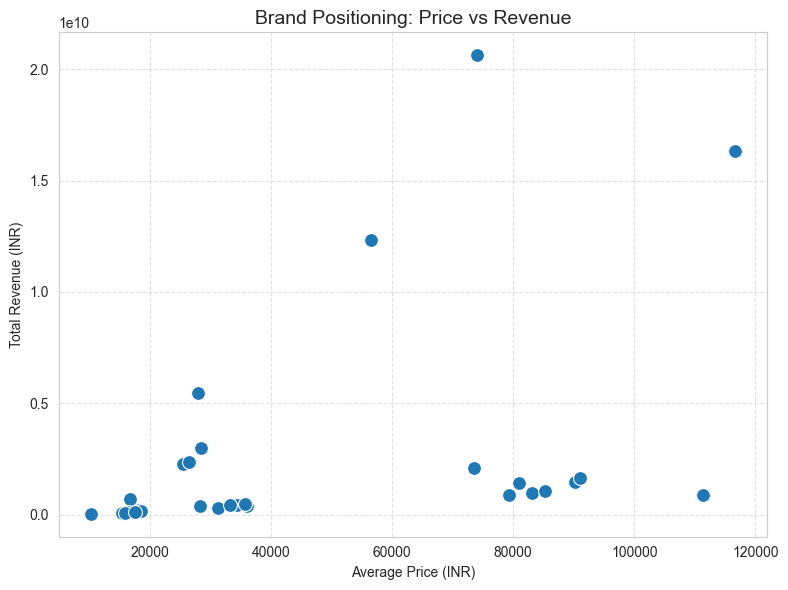

In [7]:
# =========================
# IMPORTS
# =========================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# =========================
# DATAFRAME
# =========================
df = amazon_india_2015_2025

# Required columns:
# brand, category, final_amount_inr, year

# =========================
# STEP 1: BRAND-WISE REVENUE PERFORMANCE
# =========================
brand_revenue = (
    df.groupby('brand')['final_amount_inr']
    .sum()
    .reset_index(name='total_revenue')
    .sort_values('total_revenue', ascending=False)
)

print("Top Brands by Revenue:")
display(brand_revenue.head(10))

plt.figure(figsize=(10, 6))
sns.barplot(
    x='total_revenue',
    y='brand',
    data=brand_revenue.head(10),
    palette='Blues_r'
)
plt.title('Top 10 Brands by Revenue', fontsize=14)
plt.xlabel('Total Revenue (INR)')
plt.ylabel('Brand')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# =========================
# STEP 2: BRAND MARKET SHARE (%)
# =========================
total_revenue_all = brand_revenue['total_revenue'].sum()

brand_revenue['market_share_%'] = (
    brand_revenue['total_revenue'] / total_revenue_all * 100
).round(2)

print("\nBrand Market Share (%):")
display(brand_revenue.head(10))

plt.figure(figsize=(8, 8))
plt.pie(
    brand_revenue.head(8)['market_share_%'],
    labels=brand_revenue.head(8)['brand'],
    autopct='%1.1f%%',
    startangle=140
)
plt.title('Market Share of Top Brands')
plt.tight_layout()
plt.show()

# =========================
# STEP 3: MARKET SHARE EVOLUTION OVER TIME (FIXED)
# =========================

# Create year column (IMPORTANT)
df['year'] = pd.to_datetime(df['order_date']).dt.year

brand_yearly = (
    df.groupby(['year', 'brand'])['final_amount_inr']
    .sum()
    .reset_index()
)

brand_yearly['yearly_market_share_%'] = (
    brand_yearly
    .groupby('year')['final_amount_inr']
    .transform(lambda x: x / x.sum() * 100)
)

top_brands = brand_revenue.head(5)['brand']

brand_yearly_top = brand_yearly[
    brand_yearly['brand'].isin(top_brands)
]

plt.figure(figsize=(10, 6))
sns.lineplot(
    x='year',
    y='yearly_market_share_%',
    hue='brand',
    data=brand_yearly_top,
    marker='o'
)
plt.title('Market Share Evolution of Top Brands', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Market Share (%)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# =========================
# STEP 4: BRAND PERFORMANCE ACROSS CATEGORIES
# =========================
brand_category = (
    df.groupby(['category', 'brand'])['final_amount_inr']
    .sum()
    .reset_index()
)

print("\nBrand Performance Across Categories (Sample):")
display(brand_category.head(10))

plt.figure(figsize=(12, 6))
sns.barplot(
    x='category',
    y='final_amount_inr',
    hue='brand',
    data=brand_category[
        brand_category['brand'].isin(top_brands)
    ],
    palette='tab10'
)
plt.title('Competitive Positioning Across Categories', fontsize=14)
plt.xlabel('Category')
plt.ylabel('Total Revenue (INR)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Brand', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# =========================
# STEP 5: BRAND POSITIONING (PRICE vs REVENUE)
# =========================
brand_positioning = (
    df.groupby('brand')
    .agg(
        avg_price=('discounted_price_inr', 'mean'),
        total_revenue=('final_amount_inr', 'sum')
    )
    .reset_index()
)

print("\nBrand Competitive Positioning:")
display(brand_positioning.head(10))

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='avg_price',
    y='total_revenue',
    data=brand_positioning,
    s=100
)
plt.title('Brand Positioning: Price vs Revenue', fontsize=14)
plt.xlabel('Average Price (INR)')
plt.ylabel('Total Revenue (INR)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# 14.

C:\Users\DVK\AppData\Local\Temp\ipykernel_21872\1347586918.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='first_purchase_year', y='CLV', data=clv_df, palette='coolwarm')


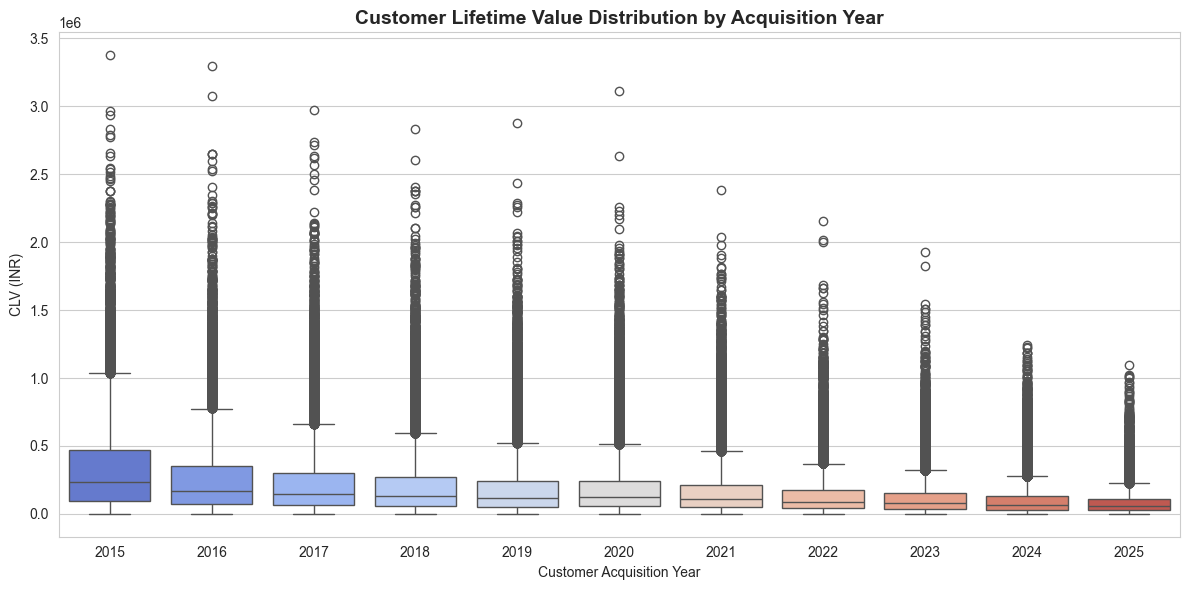

C:\Users\DVK\AppData\Local\Temp\ipykernel_21872\1347586918.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='customer_age_group', y='CLV', data=clv_df, palette='viridis')


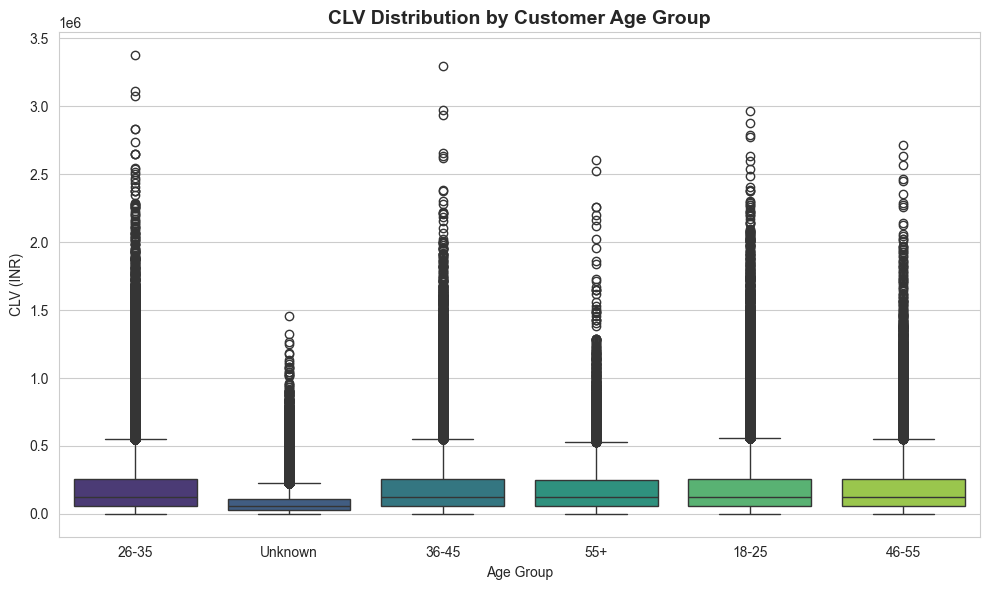

C:\Users\DVK\AppData\Local\Temp\ipykernel_21872\1347586918.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='customer_tier', y='CLV', data=clv_df, palette='Set2')


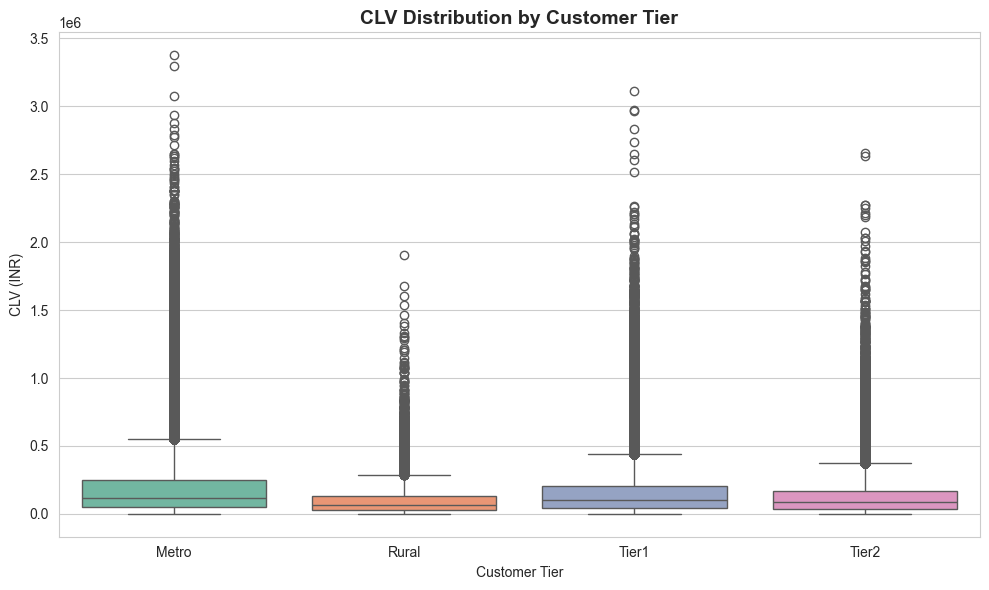

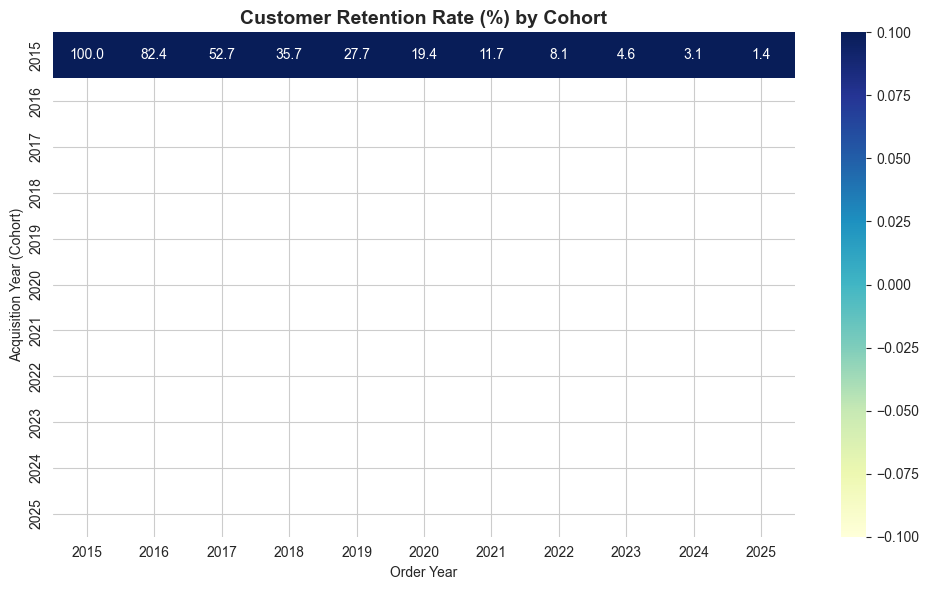

In [8]:
# Ensure order_date is in datetime format
amazon_india_2015_2025['order_date'] = pd.to_datetime(amazon_india_2015_2025['order_date'], errors='coerce')

# Identify First Purchase Year (Customer Acquisition Year)
amazon_india_2015_2025['first_purchase_year'] = amazon_india_2015_2025.groupby('customer_id')['order_date'].transform('min').dt.year

# Calculate Customer Lifetime Value (CLV)
clv_df = amazon_india_2015_2025.groupby(
    ['customer_id', 'first_purchase_year', 'customer_age_group', 'customer_tier']
)['final_amount_inr'].sum().reset_index(name='CLV')

# CLV Distribution by Acquisition Year
plt.figure(figsize=(12, 6))
sns.boxplot(x='first_purchase_year', y='CLV', data=clv_df, palette='coolwarm')
plt.title('Customer Lifetime Value Distribution by Acquisition Year', fontsize=14, weight='bold')
plt.xlabel('Customer Acquisition Year')
plt.ylabel('CLV (INR)')
plt.tight_layout()
plt.show()

# CLV Distribution by Age Group
plt.figure(figsize=(10, 6))
sns.boxplot(x='customer_age_group', y='CLV', data=clv_df, palette='viridis')
plt.title('CLV Distribution by Customer Age Group', fontsize=14, weight='bold')
plt.xlabel('Age Group')
plt.ylabel('CLV (INR)')
plt.tight_layout()
plt.show()

# CLV Distribution by Customer Tier
plt.figure(figsize=(10, 6))
sns.boxplot(x='customer_tier', y='CLV', data=clv_df, palette='Set2')
plt.title('CLV Distribution by Customer Tier', fontsize=14, weight='bold')
plt.xlabel('Customer Tier')
plt.ylabel('CLV (INR)')
plt.tight_layout()
plt.show()

# Optional: Retention Cohort Table (for advanced insight)
cohort_table = df.groupby(['first_purchase_year', 'order_year'])['customer_id'].nunique().unstack(fill_value=0)
retention_rate = cohort_table.divide(cohort_table.iloc[:, 0], axis=0) * 100

plt.figure(figsize=(10, 6))
sns.heatmap(retention_rate, annot=True, fmt=".1f", cmap='YlGnBu')
plt.title('Customer Retention Rate (%) by Cohort', fontsize=14, weight='bold')
plt.xlabel('Order Year')
plt.ylabel('Acquisition Year (Cohort)')
plt.tight_layout()
plt.show()

# 15

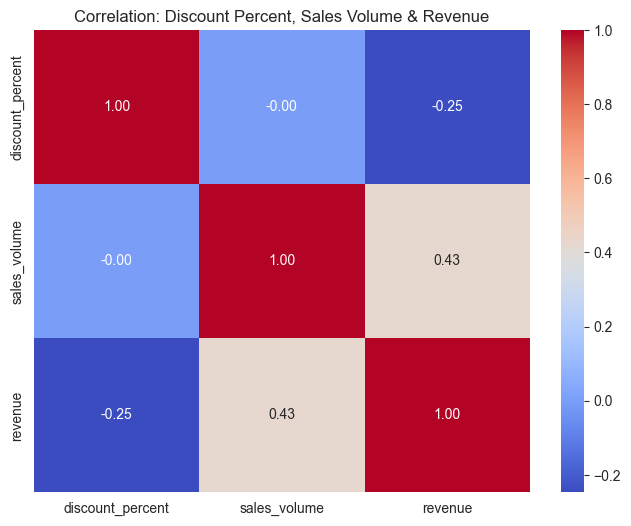

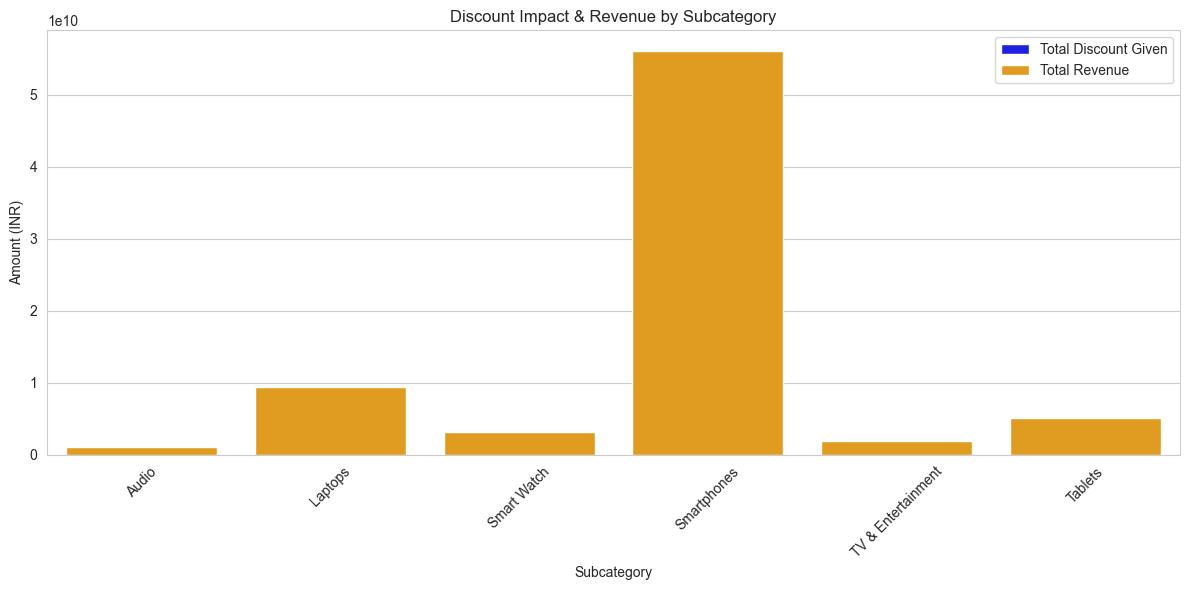

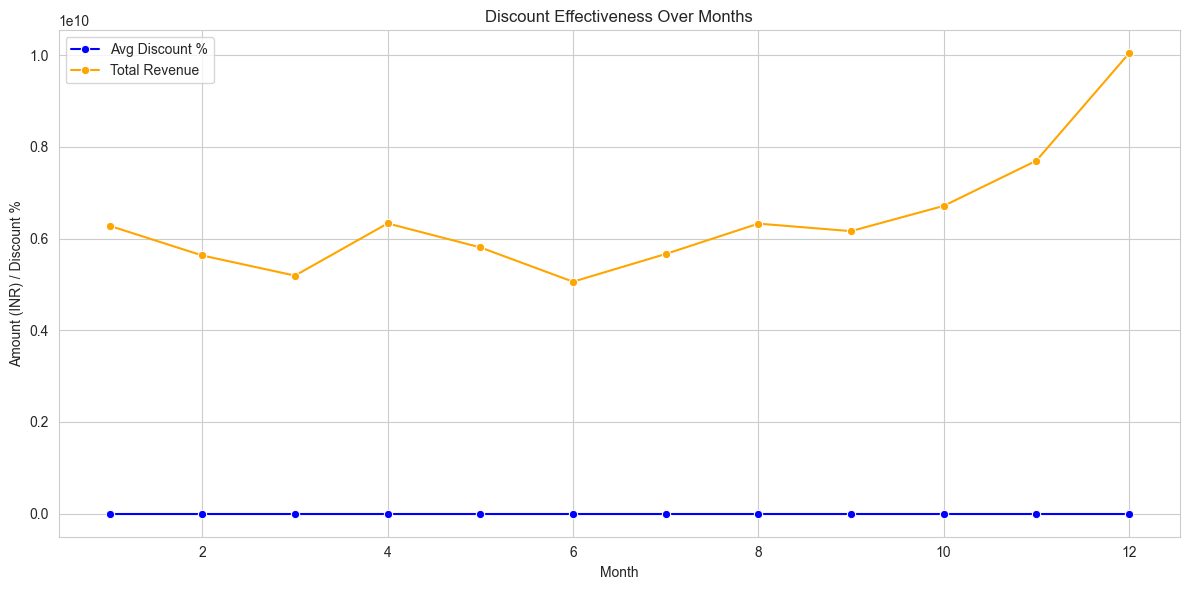

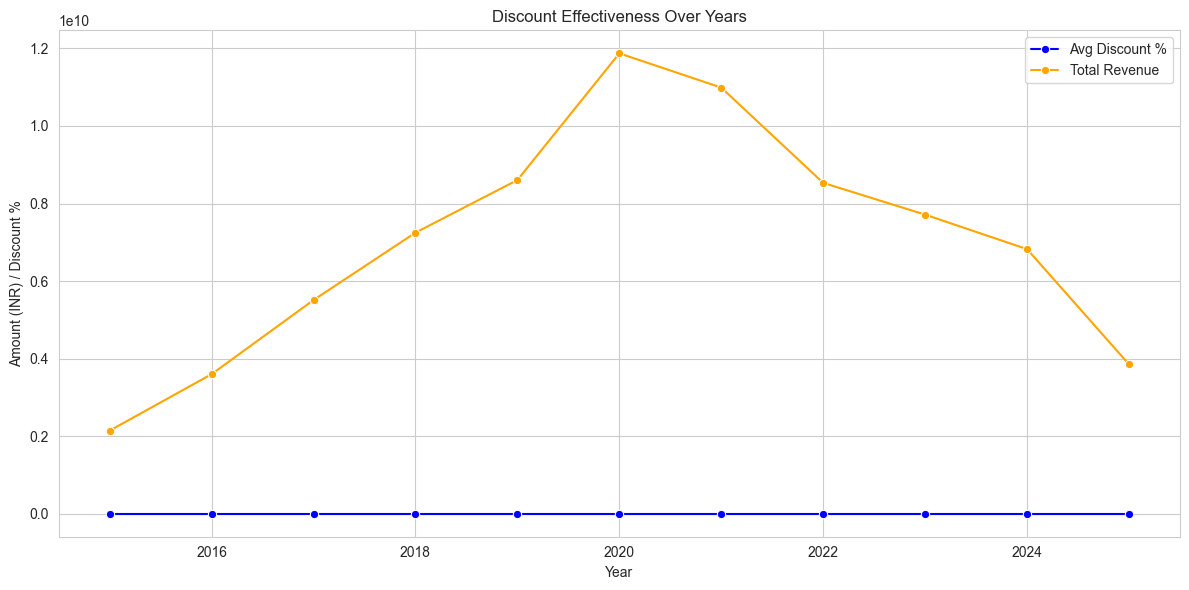

In [9]:
# Ensure order_date is datetime
amazon_india_2015_2025['order_date'] = pd.to_datetime(amazon_india_2015_2025['order_date'], errors='coerce')

# Calculate Discount Amount
amazon_india_2015_2025['discount_amount_inr'] = amazon_india_2015_2025['original_price_inr'] * (amazon_india_2015_2025['discount_percent'] / 100)

# Ensure revenue and sales volume columns exist
amazon_india_2015_2025['revenue'] = amazon_india_2015_2025['final_amount_inr']
amazon_india_2015_2025['sales_volume'] = amazon_india_2015_2025['quantity']
# Correlation Analysis
correlation_data = df[['discount_percent', 'sales_volume', 'revenue']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(correlation_data, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation: Discount Percent, Sales Volume & Revenue')
plt.show()

# Discount Effectiveness by Subcategory
category_discount_effect = df.groupby('subcategory').agg(
    total_discount_given=('discount_amount_inr', 'sum'),
    total_sales_volume=('sales_volume', 'sum'),
    total_revenue=('revenue', 'sum')
).reset_index()

plt.figure(figsize=(12,6))
sns.barplot(x='subcategory', y='total_discount_given', data=category_discount_effect, color='blue', label='Total Discount Given')
sns.barplot(x='subcategory', y='total_revenue', data=category_discount_effect, color='orange', label='Total Revenue')
plt.title('Discount Impact & Revenue by Subcategory')
plt.xlabel('Subcategory')
plt.ylabel('Amount (INR)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Discount Effectiveness Over Months
df['order_month'] = df['order_date'].dt.month
df['order_year'] = df['order_date'].dt.year

monthly_discount_effect = df.groupby('order_month').agg(
    avg_discount_percent=('discount_percent', 'mean'),
    total_sales_volume=('sales_volume', 'sum'),
    total_revenue=('revenue', 'sum')
).reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(x='order_month', y='avg_discount_percent', data=monthly_discount_effect,
             label='Avg Discount %', marker='o', color='blue')
sns.lineplot(x='order_month', y='total_revenue', data=monthly_discount_effect,
             label='Total Revenue', marker='o', color='orange')
plt.title('Discount Effectiveness Over Months')
plt.xlabel('Month')
plt.ylabel('Amount (INR) / Discount %')
plt.legend()
plt.tight_layout()
plt.show()

# Discount Effectiveness Over Years
yearly_discount_effect = df.groupby('order_year').agg(
    avg_discount_percent=('discount_percent', 'mean'),
    total_sales_volume=('sales_volume', 'sum'),
    total_revenue=('revenue', 'sum')
).reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(x='order_year', y='avg_discount_percent', data=yearly_discount_effect,
             label='Avg Discount %', marker='o', color='blue')
sns.lineplot(x='order_year', y='total_revenue', data=yearly_discount_effect,
             label='Total Revenue', marker='o', color='orange')
plt.title('Discount Effectiveness Over Years')
plt.xlabel('Year')
plt.ylabel('Amount (INR) / Discount %')
plt.legend()
plt.tight_layout()
plt.show()


# 16

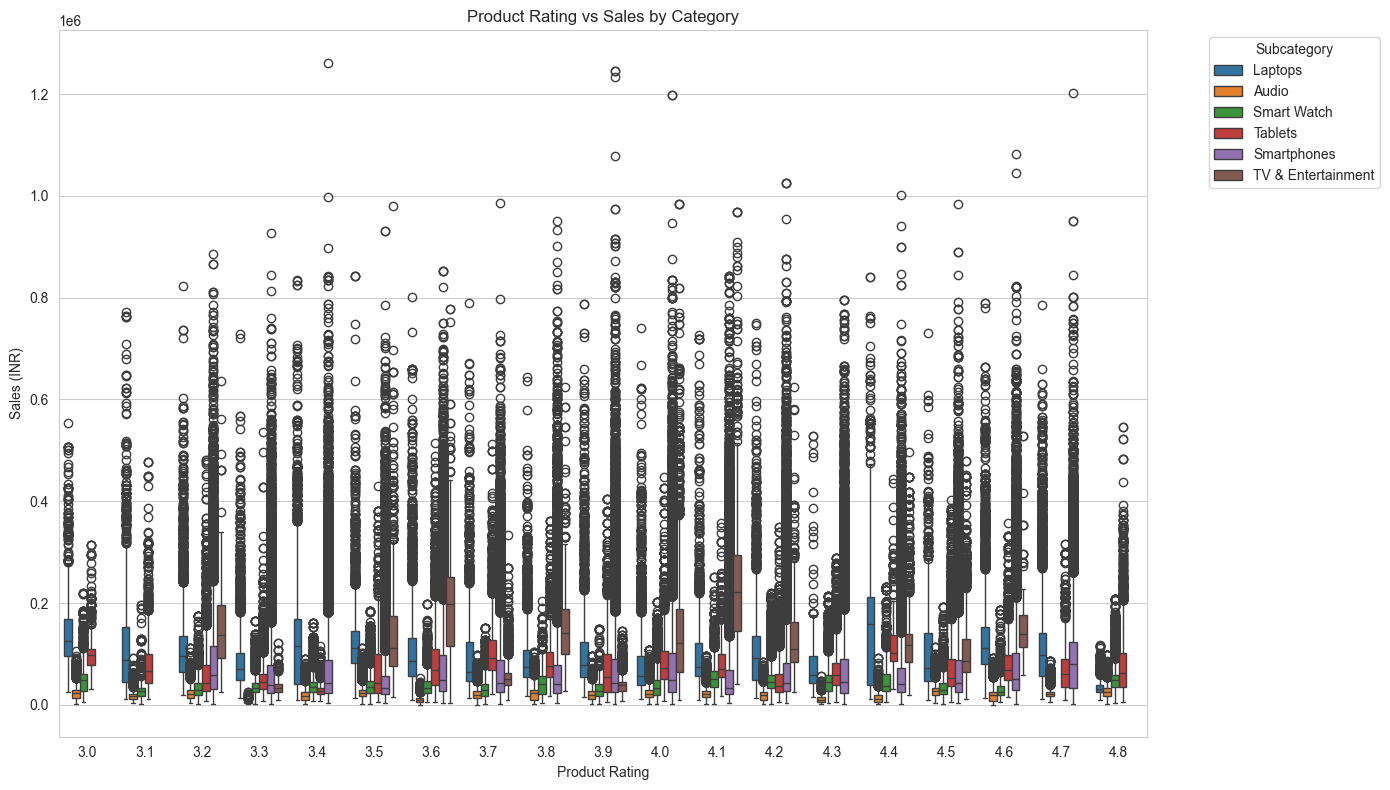

Correlation between Product Rating and Sales (INR) by Subcategory:
          subcategory  correlation
0               Audio    -0.007271
1             Laptops    -0.005728
2         Smart Watch     0.111370
3         Smartphones     0.034121
4  TV & Entertainment     0.062350
5             Tablets     0.017741


C:\Users\DVK\AppData\Roaming\Python\Python314\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


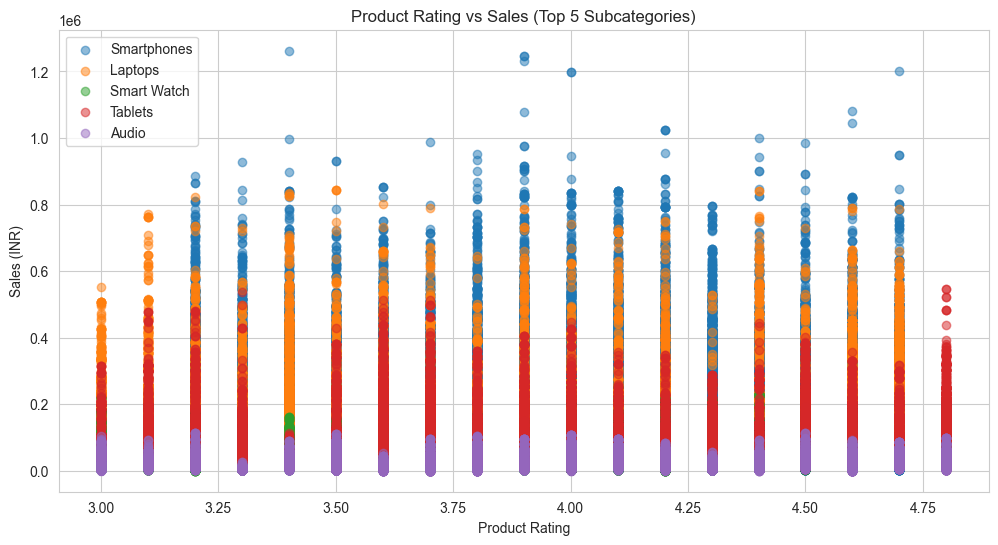

In [10]:
# Product Ratings vs Sales by Category
plt.figure(figsize=(14,8))
sns.boxplot(
    x='product_rating',
    y='final_amount_inr',
    data=amazon_india_2015_2025,
    hue='subcategory'
)
plt.title('Product Rating vs Sales by Category')
plt.xlabel('Product Rating')
plt.ylabel('Sales (INR)')
plt.legend(title='Subcategory', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Correlation: Product Rating vs Sales per Subcategory
category_rating_corr = amazon_india_2015_2025.groupby('subcategory')[['product_rating', 'final_amount_inr']].corr().iloc[0::2, -1]
category_rating_corr = category_rating_corr.reset_index()
category_rating_corr.columns = ['subcategory', 'level_1', 'correlation']
category_rating_corr = category_rating_corr[['subcategory', 'correlation']]

print("Correlation between Product Rating and Sales (INR) by Subcategory:")
print(category_rating_corr)

# Optional: Scatter plot for high-volume subcategories
top_subcategories = amazon_india_2015_2025['subcategory'].value_counts().nlargest(5).index
plt.figure(figsize=(12,6))
for subcat in top_subcategories:
    subset = amazon_india_2015_2025[amazon_india_2015_2025['subcategory'] == subcat]
    plt.scatter(subset['product_rating'], subset['final_amount_inr'], alpha=0.5, label=subcat)
plt.title('Product Rating vs Sales (Top 5 Subcategories)')
plt.xlabel('Product Rating')
plt.ylabel('Sales (INR)')
plt.legend()
plt.show()


#17

Purchase Frequency Summary:


,customer_id,total_orders,first_purchase,last_purchase
0,CUST_2015_00000001,5,2015-09-03,2018-12-15
1,CUST_2015_00000002,10,2015-07-28,2022-11-02
2,CUST_2015_00000003,9,2015-01-05,2017-09-14
3,CUST_2015_00000004,8,2015-02-28,2021-07-06
4,CUST_2015_00000005,5,2015-01-21,2018-04-06


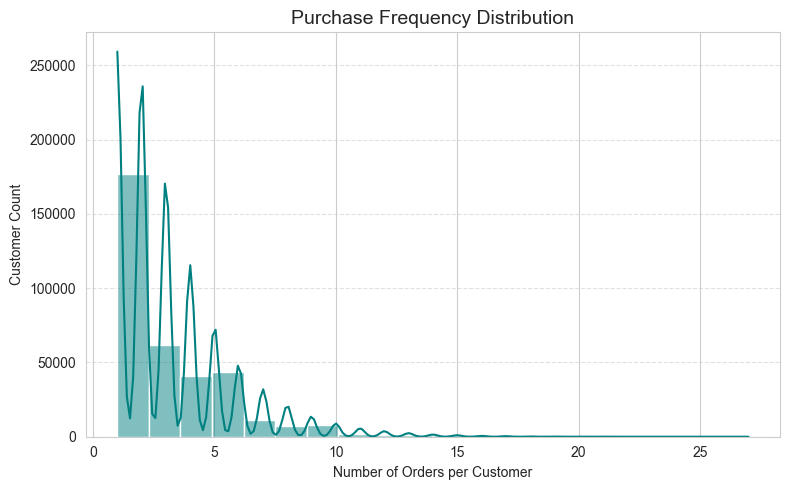


Customer Evolution Stages:


,customer_stage,customer_count
0,First-Time,91365
1,Loyal,75676
2,Repeat,187928


C:\Users\DVK\AppData\Local\Temp\ipykernel_21872\3773724706.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


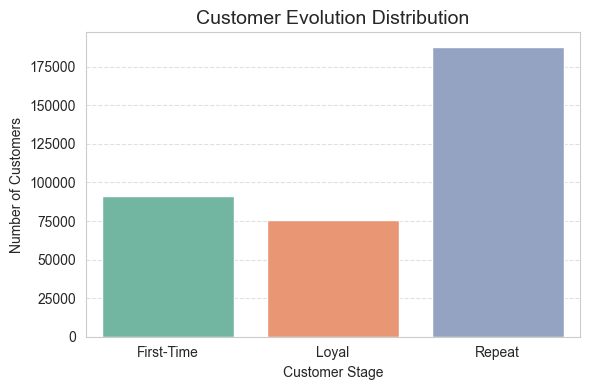


Category Transition Sample:


,category,next_category,transition_count
0,Electronics,Electronics,772334
1,Electronics,Electronics & Accessories,149
2,Electronics & Accessories,Electronics,156
3,Electronics & Accessories,Electronics & Accessories,1



Category Transition Matrix (Probabilities):


next_category,Electronics,Electronics & Accessories
category,,
Electronics,1.00,0.00
Electronics & Accessories,0.99,0.01


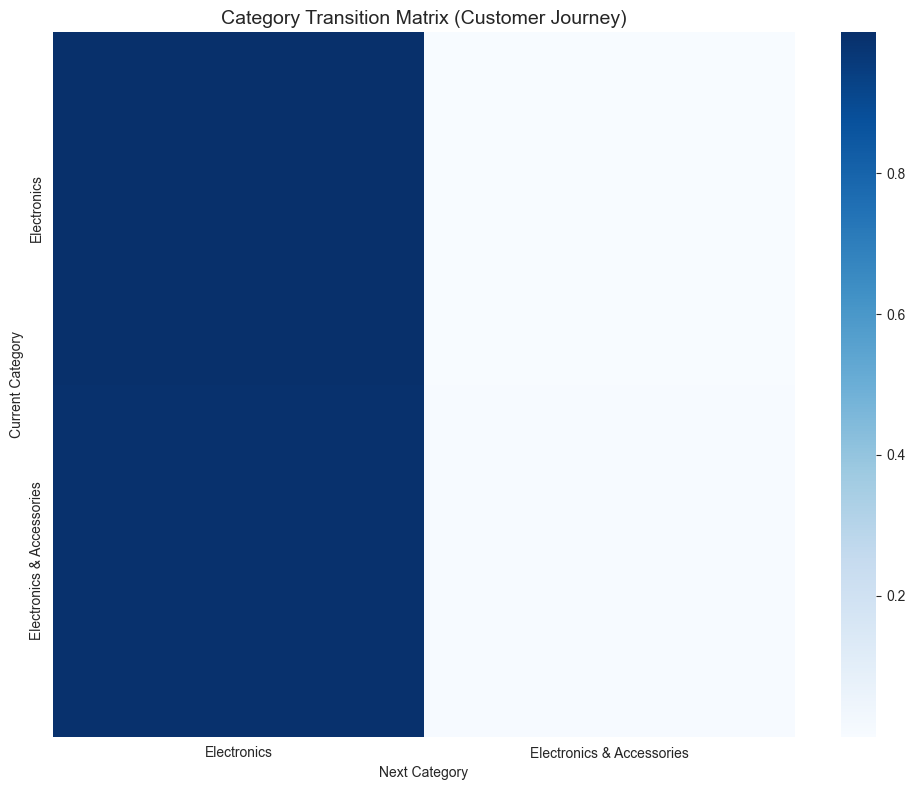


Category Preferences by Customer Stage (Sample):


,customer_stage,category,order_count
0,First-Time,Electronics,91348
1,First-Time,Electronics & Accessories,17
2,Loyal,Electronics,517342
3,Loyal,Electronics & Accessories,114
4,Repeat,Electronics,518701


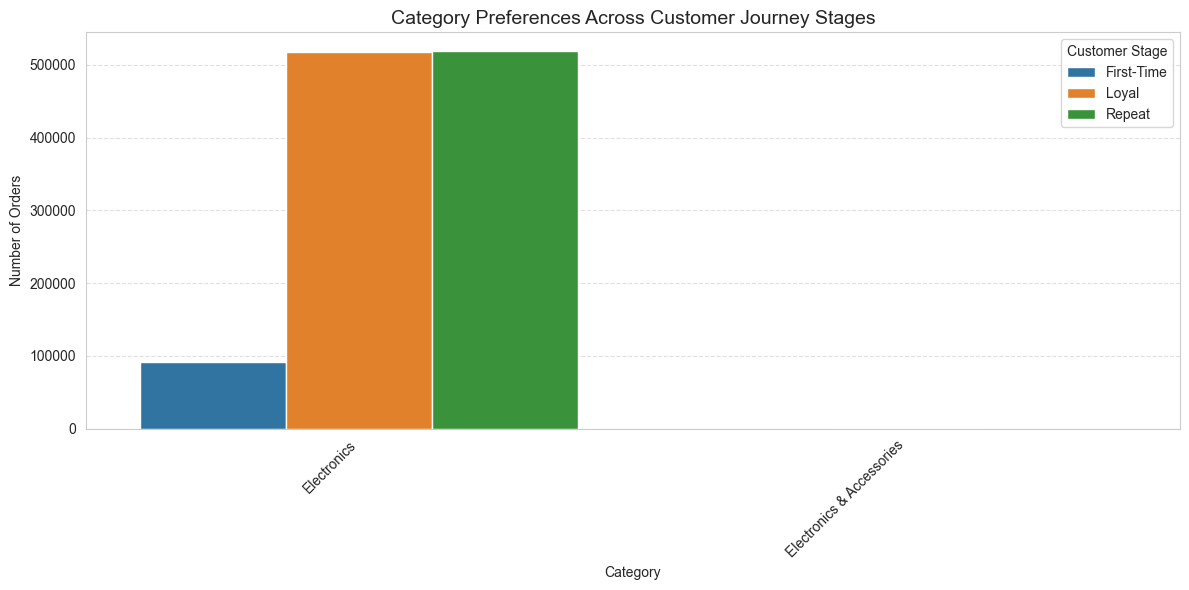

In [17]:
# =========================
# IMPORTS
# =========================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# =========================
# DATAFRAME
# =========================
df = amazon_india_2015_2025

# Required columns:
# customer_id, order_date_clean, category, transaction_id

# Ensure datetime
df['order_date'] = pd.to_datetime(df['order_date'])

# =========================
# STEP 1: PURCHASE FREQUENCY PATTERNS
# =========================
purchase_freq = (
    df.groupby('customer_id')
    .agg(
        total_orders=('transaction_id', 'count'),
        first_purchase=('order_date', 'min'),
        last_purchase=('order_date', 'max')
    )
    .reset_index()
)

print("Purchase Frequency Summary:")
display(purchase_freq.head())

plt.figure(figsize=(8, 5))
sns.histplot(
    purchase_freq['total_orders'],
    bins=20,
    kde=True,
    color='teal'
)
plt.title('Purchase Frequency Distribution', fontsize=14)
plt.xlabel('Number of Orders per Customer')
plt.ylabel('Customer Count')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# =========================
# STEP 2: CUSTOMER EVOLUTION STAGES
# =========================
def customer_stage(x):
    if x == 1:
        return 'First-Time'
    elif 2 <= x <= 4:
        return 'Repeat'
    else:
        return 'Loyal'

purchase_freq['customer_stage'] = purchase_freq['total_orders'].apply(customer_stage)

stage_distribution = (
    purchase_freq.groupby('customer_stage')
    .size()
    .reset_index(name='customer_count')
)

print("\nCustomer Evolution Stages:")
display(stage_distribution)

plt.figure(figsize=(6, 4))
sns.barplot(
    x='customer_stage',
    y='customer_count',
    data=stage_distribution,
    palette='Set2'
)
plt.title('Customer Evolution Distribution', fontsize=14)
plt.xlabel('Customer Stage')
plt.ylabel('Number of Customers')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# =========================
# STEP 3: CATEGORY TRANSITION DATA
# =========================
df_sorted = df.sort_values(['customer_id', 'order_date'])

df_sorted['next_category'] = (
    df_sorted.groupby('customer_id')['category']
    .shift(-1)
)

transitions = df_sorted.dropna(subset=['next_category'])

transition_counts = (
    transitions.groupby(['category', 'next_category'])
    .size()
    .reset_index(name='transition_count')
)

print("\nCategory Transition Sample:")
display(transition_counts.head())

# =========================
# STEP 4: TRANSITION MATRIX
# =========================
transition_matrix = transition_counts.pivot(
    index='category',
    columns='next_category',
    values='transition_count'
).fillna(0)

# Normalize to probabilities
transition_matrix_prob = transition_matrix.div(
    transition_matrix.sum(axis=1), axis=0
)

print("\nCategory Transition Matrix (Probabilities):")
display(transition_matrix_prob.round(2))

plt.figure(figsize=(10, 8))
sns.heatmap(
    transition_matrix_prob,
    cmap='Blues',
    annot=False
)
plt.title('Category Transition Matrix (Customer Journey)', fontsize=14)
plt.xlabel('Next Category')
plt.ylabel('Current Category')
plt.tight_layout()
plt.show()

# =========================
# STEP 5: CATEGORY PREFERENCES BY CUSTOMER STAGE
# =========================
df_stage = df.merge(
    purchase_freq[['customer_id', 'customer_stage']],
    on='customer_id',
    how='left'
)

stage_category = (
    df_stage.groupby(['customer_stage', 'category'])
    .size()
    .reset_index(name='order_count')
)

print("\nCategory Preferences by Customer Stage (Sample):")
display(stage_category.head())

plt.figure(figsize=(12, 6))
sns.barplot(
    x='category',
    y='order_count',
    hue='customer_stage',
    data=stage_category,
    palette='tab10'
)
plt.title('Category Preferences Across Customer Journey Stages', fontsize=14)
plt.xlabel('Category')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Customer Stage')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# 18

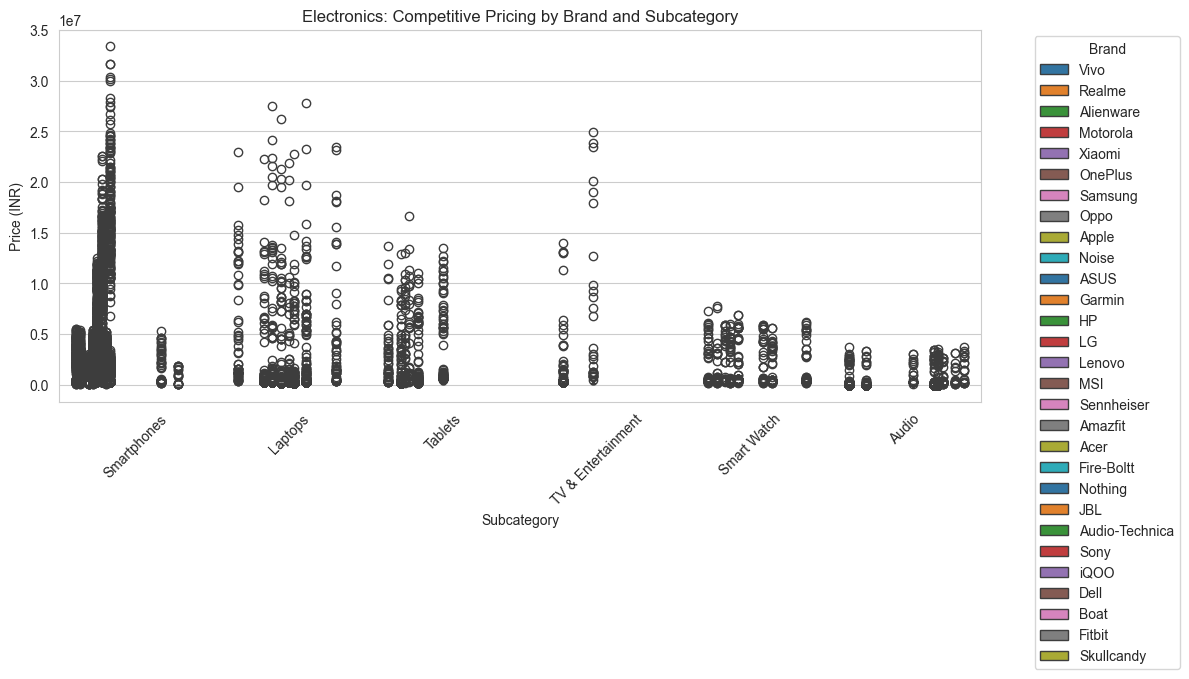

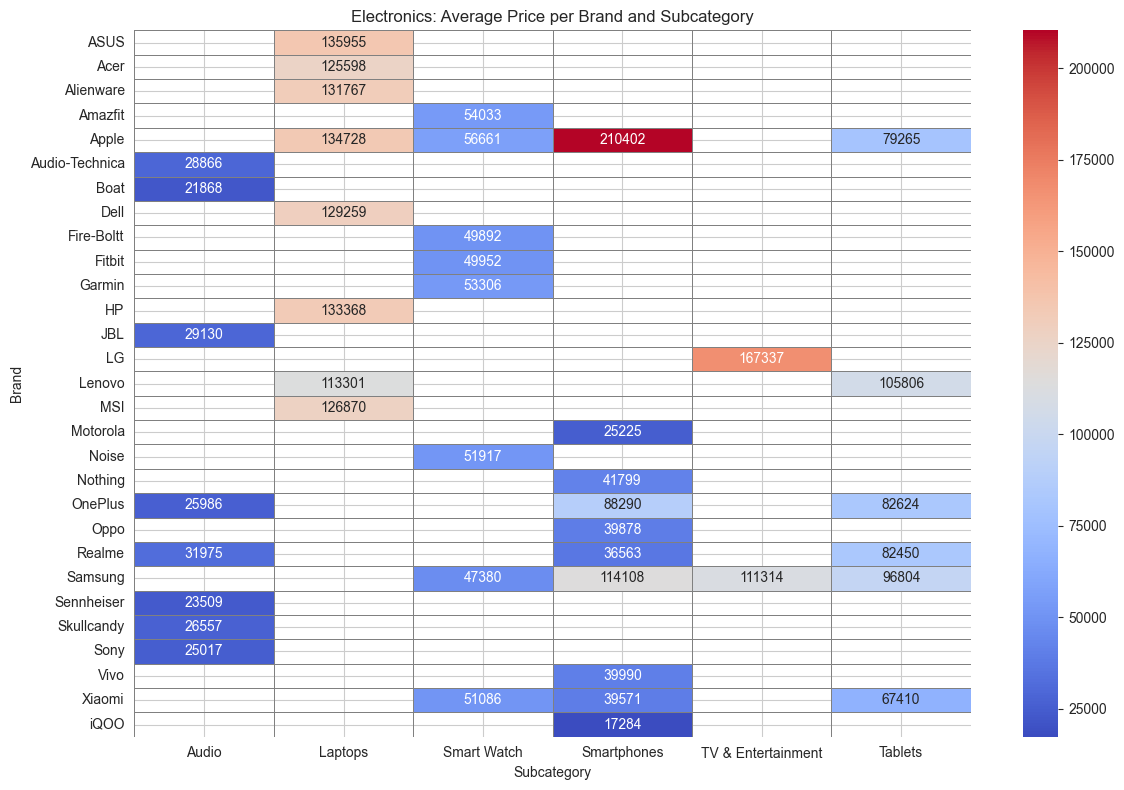

In [11]:
# Filter Electronics category
electronics_df = amazon_india_2015_2025[amazon_india_2015_2025['category'] == 'Electronics']

# Competitive Pricing by Brand and Subcategory (Boxplot)
plt.figure(figsize=(12, 6))
sns.boxplot(
    x='subcategory', 
    y='original_price_inr', 
    data=electronics_df, 
    hue='brand', 
    palette='tab10'
)
plt.title('Electronics: Competitive Pricing by Brand and Subcategory')
plt.xlabel('Subcategory')
plt.ylabel('Price (INR)')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Brand')
plt.tight_layout()
plt.show()

# Competitive Matrix: Average Price per Brand per Subcategory (Heatmap)
competitive_matrix = electronics_df.pivot_table(
    index='brand', 
    columns='subcategory', 
    values='original_price_inr', 
    aggfunc='mean'
)

plt.figure(figsize=(12, 8))
sns.heatmap(
    competitive_matrix, 
    annot=True, 
    cmap='coolwarm', 
    fmt='.0f', 
    linewidths=0.5, 
    linecolor='gray'
)
plt.title('Electronics: Average Price per Brand and Subcategory')
plt.xlabel('Subcategory')
plt.ylabel('Brand')
plt.tight_layout()
plt.show()


# 19

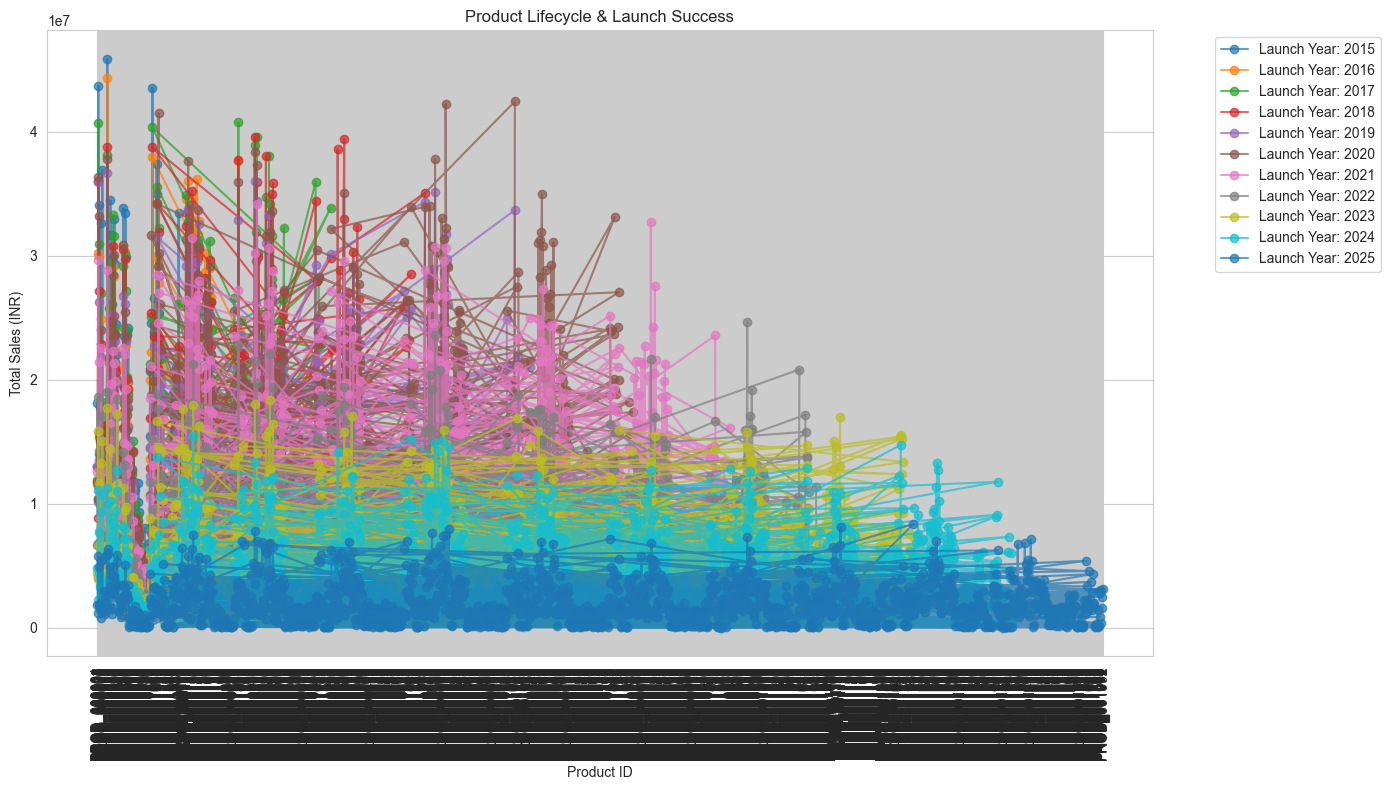

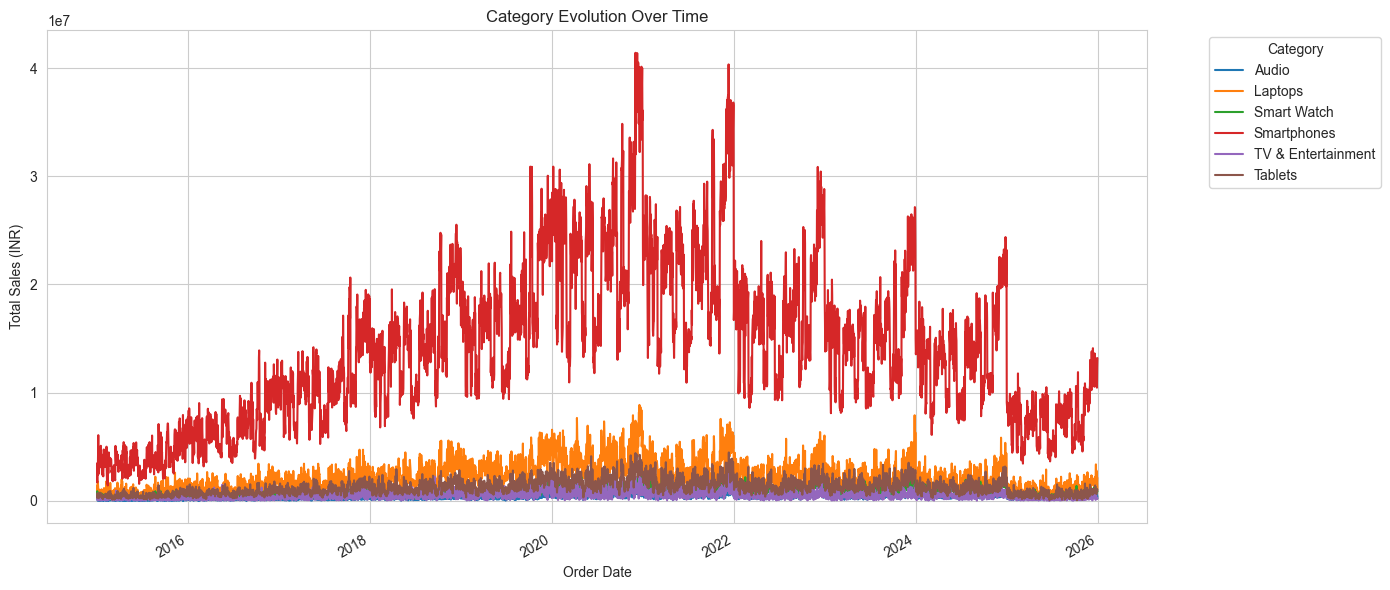

In [13]:

# Add Launch Year
amazon_india_2015_2025['launch_year'] = amazon_india_2015_2025['order_date'].dt.year

# Product Launch Success
# Analyze total sales per product grouped by launch year
product_launch = amazon_india_2015_2025.groupby(['launch_year', 'product_id']).agg(
    total_sales=('final_amount_inr', 'sum')
).reset_index()

plt.figure(figsize=(14, 8))

# Plot sales per product for each launch year
for year in sorted(product_launch['launch_year'].unique()):
    year_data = product_launch[product_launch['launch_year'] == year]
    plt.plot(year_data['product_id'], year_data['total_sales'], marker='o', linestyle='-', alpha=0.7, label=f'Launch Year: {year}')

plt.title('Product Lifecycle & Launch Success')
plt.xlabel('Product ID')
plt.ylabel('Total Sales (INR)')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Category Evolution Over Time
# Analyze how categories evolve across the years
category_evolution = amazon_india_2015_2025.groupby(['order_date', 'subcategory']).agg(
    total_sales=('final_amount_inr', 'sum')
).reset_index()

# Pivot for time series plotting
category_evolution_pivot = category_evolution.pivot_table(
    index='order_date', columns='subcategory', values='total_sales', aggfunc='sum'
)

# Plot category evolution
plt.figure(figsize=(14, 6))
category_evolution_pivot.plot(ax=plt.gca())
plt.title('Category Evolution Over Time')
plt.xlabel('Order Date')
plt.ylabel('Total Sales (INR)')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# 20

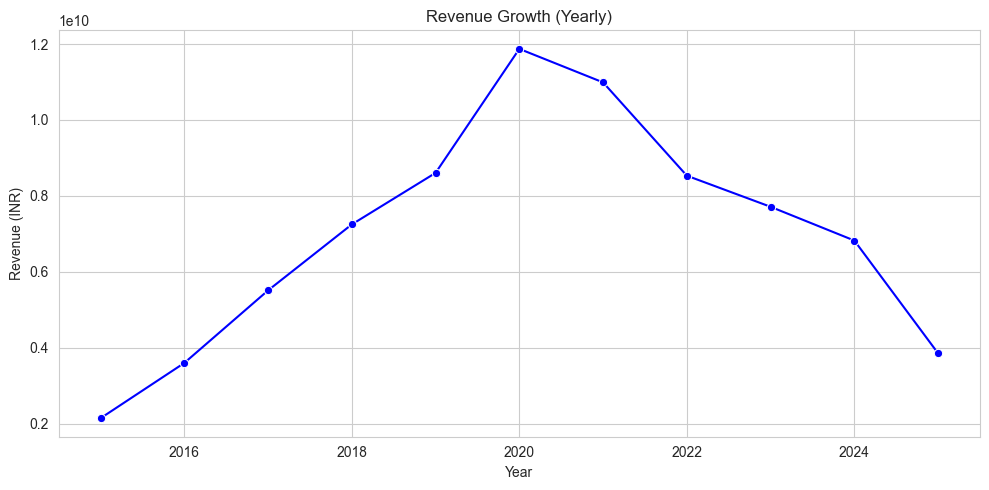

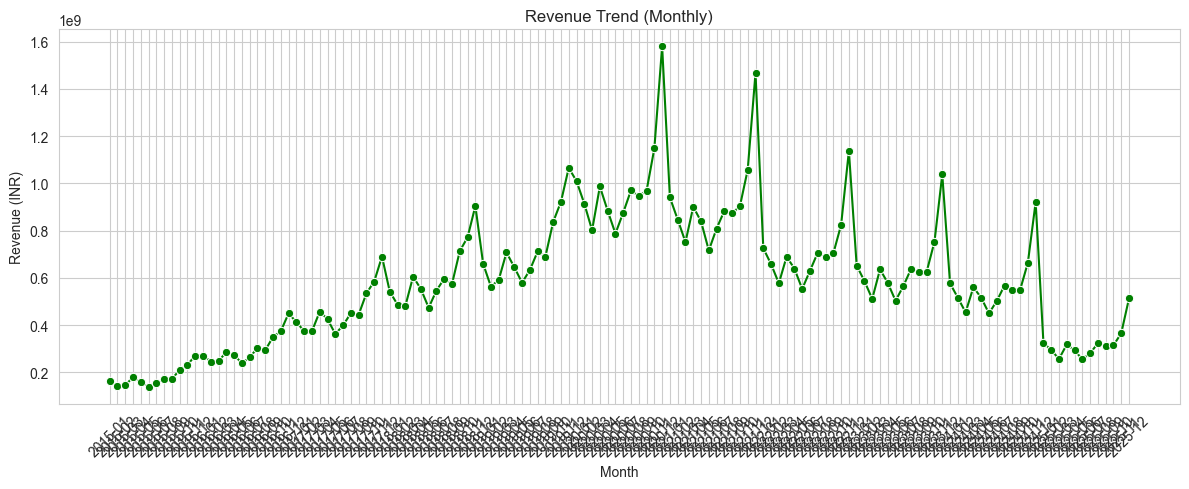

C:\Users\DVK\AppData\Local\Temp\ipykernel_21872\3444363827.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='acquisition_year', y='customer_id', data=new_customers, palette='Blues_d')


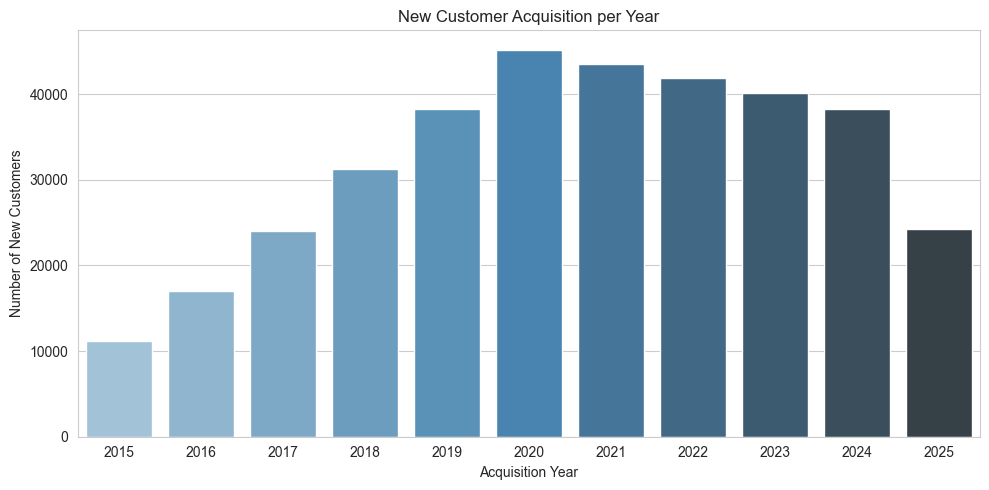

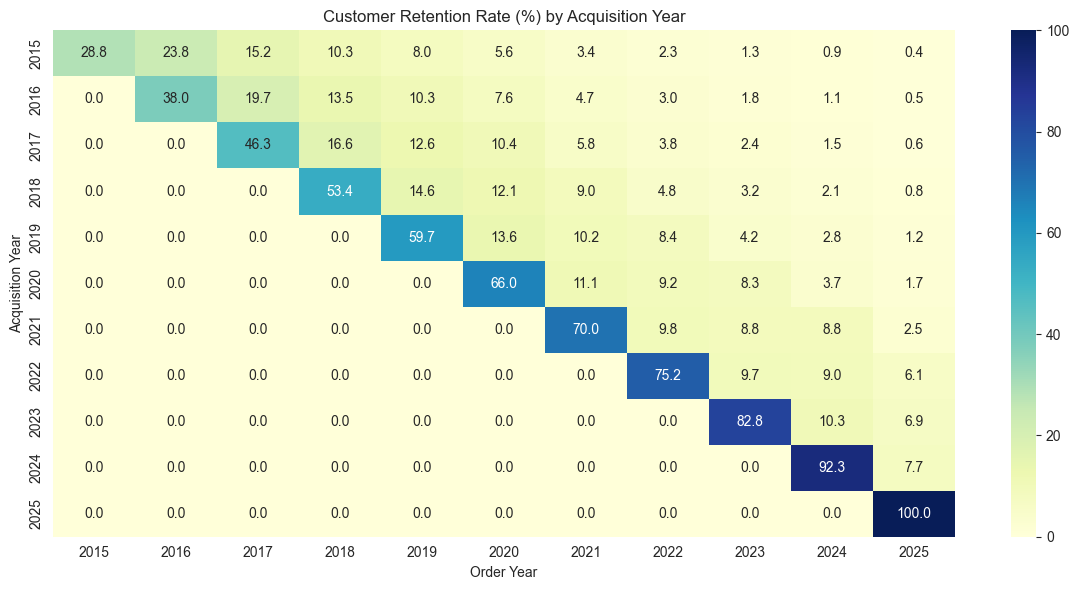

C:\Users\DVK\AppData\Local\Temp\ipykernel_21872\3444363827.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='loyalty_status', y='customer_id', data=loyalty_summary, palette='Set2')


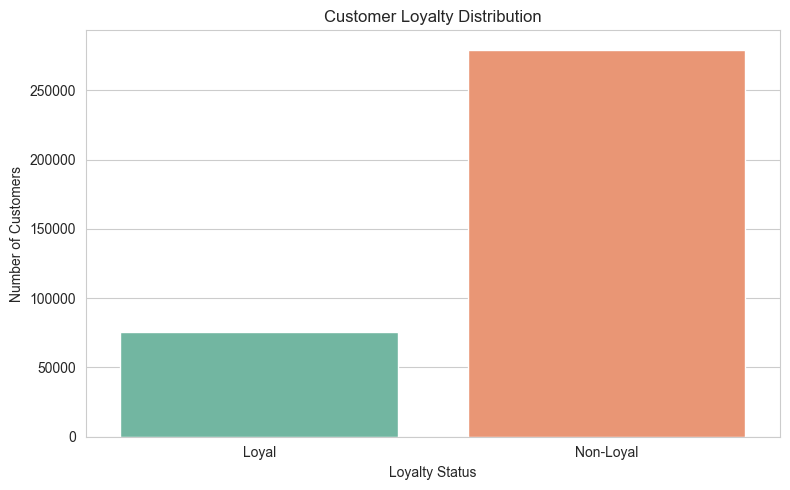

----- Executive Summary -----
Total Revenue: ₹76,888,729,563
Total Orders: 1127609
Total Customers: 354969
Average Order Value: ₹68,187.40
Average Delivery Days: 3.33
Return Rate: 7.02%
Loyal Customers: 75676


In [12]:
# Step 0: Preprocessing
amazon_india_2015_2025['order_date'] = pd.to_datetime(amazon_india_2015_2025['order_date'], errors='coerce')
amazon_india_2015_2025['revenue'] = amazon_india_2015_2025['final_amount_inr']

amazon_india_2015_2025['order_year'] = amazon_india_2015_2025['order_date'].dt.year
amazon_india_2015_2025['order_month'] = amazon_india_2015_2025['order_date'].dt.to_period('M')
# Step 1: First Purchase Date & Acquisition Year
# Drop existing column to avoid merge error
amazon_india_2015_2025 = amazon_india_2015_2025.drop(columns=['first_purchase_date'], errors='ignore')

first_purchase = amazon_india_2015_2025.groupby('customer_id')['order_date'].min().reset_index()
first_purchase.rename(columns={'order_date':'first_purchase_date'}, inplace=True)
amazon_india_2015_2025 = amazon_india_2015_2025.merge(first_purchase, on='customer_id', how='left')
amazon_india_2015_2025['acquisition_year'] = amazon_india_2015_2025['first_purchase_date'].dt.year

# Step 2: Purchase Count & Loyalty Status
amazon_india_2015_2025['purchase_count'] = amazon_india_2015_2025.groupby('customer_id').cumcount() + 1
loyal_customers = amazon_india_2015_2025.groupby('customer_id')['purchase_count'].max().reset_index()
loyal_customers['loyalty_status'] = loyal_customers['purchase_count'].apply(lambda x: 'Loyal' if x >= 5 else 'Non-Loyal')

# Drop existing column to avoid merge error
amazon_india_2015_2025 = amazon_india_2015_2025.drop(columns=['loyalty_status'], errors='ignore')
amazon_india_2015_2025 = amazon_india_2015_2025.merge(loyal_customers[['customer_id','loyalty_status']], on='customer_id', how='left')

# Step 3: Revenue Growth (Yearly)
revenue_yearly = amazon_india_2015_2025.groupby('order_year')['revenue'].sum().reset_index()
plt.figure(figsize=(10,5))
sns.lineplot(x='order_year', y='revenue', data=revenue_yearly, marker='o', color='blue')
plt.title('Revenue Growth (Yearly)')
plt.xlabel('Year')
plt.ylabel('Revenue (INR)')
plt.tight_layout()
plt.show()

# Step 4: Revenue Trend (Monthly)
revenue_monthly = amazon_india_2015_2025.groupby('order_month')['revenue'].sum().reset_index()
revenue_monthly['order_month_str'] = revenue_monthly['order_month'].astype(str)
plt.figure(figsize=(12,5))
sns.lineplot(x='order_month_str', y='revenue', data=revenue_monthly, marker='o', color='green')
plt.title('Revenue Trend (Monthly)')
plt.xlabel('Month')
plt.ylabel('Revenue (INR)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 5: New Customer Acquisition
new_customers = amazon_india_2015_2025.groupby('acquisition_year')['customer_id'].nunique().reset_index()
plt.figure(figsize=(10,5))
sns.barplot(x='acquisition_year', y='customer_id', data=new_customers, palette='Blues_d')
plt.title('New Customer Acquisition per Year')
plt.xlabel('Acquisition Year')
plt.ylabel('Number of New Customers')
plt.tight_layout()
plt.show()

# Step 6: Customer Retention Rate
retention = amazon_india_2015_2025.groupby(['acquisition_year','order_year'])['customer_id'].nunique().unstack(fill_value=0)
retention_rate = retention.div(retention.sum(axis=1), axis=0) * 100
plt.figure(figsize=(12,6))
sns.heatmap(retention_rate, annot=True, fmt=".1f", cmap='YlGnBu')
plt.title('Customer Retention Rate (%) by Acquisition Year')
plt.xlabel('Order Year')
plt.ylabel('Acquisition Year')
plt.tight_layout()
plt.show()

# Step 7: Loyalty Status Distribution
loyalty_summary = amazon_india_2015_2025.groupby('loyalty_status')['customer_id'].nunique().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(x='loyalty_status', y='customer_id', data=loyalty_summary, palette='Set2')
plt.title('Customer Loyalty Distribution')
plt.xlabel('Loyalty Status')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

# Step 8: Executive Summary
total_revenue = amazon_india_2015_2025['revenue'].sum()
total_orders = amazon_india_2015_2025['transaction_id'].nunique()
total_customers = amazon_india_2015_2025['customer_id'].nunique()
average_order_value = total_revenue / total_orders
average_delivery_days = amazon_india_2015_2025['delivery_days'].mean()
return_rate = amazon_india_2015_2025[amazon_india_2015_2025['return_status']=='Returned'].shape[0] / amazon_india_2015_2025.shape[0]
loyal_count = loyal_customers[loyal_customers['loyalty_status']=='Loyal'].shape[0]

print("----- Executive Summary -----")
print(f"Total Revenue: ₹{total_revenue:,.0f}")
print(f"Total Orders: {total_orders}")
print(f"Total Customers: {total_customers}")
print(f"Average Order Value: ₹{average_order_value:,.2f}")
print(f"Average Delivery Days: {average_delivery_days:.2f}")
print(f"Return Rate: {return_rate:.2%}")
print(f"Loyal Customers: {loyal_count}")
